# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0. 라이브러리 준비

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 분석의 목적과 변수 확인

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/github/week3/train.csv')
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 2. 데이터 전체적으로 살펴보기

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. 데이터의 개별 속성 파악하기

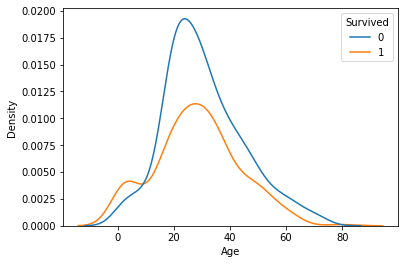

In [11]:
sns.kdeplot(x=df['Age'], hue=df['Survived'])
plt.show()

[]

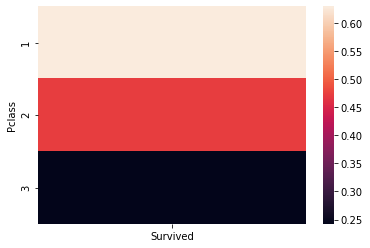

In [12]:
# df[['Pclass','Survived']].groupby(['Pclass']).count()
# df[['Pclass','Survived']].groupby(['Pclass']).sum()
sns.heatmap(df[['Pclass','Survived']].groupby(['Pclass']).mean())
plt.plot()

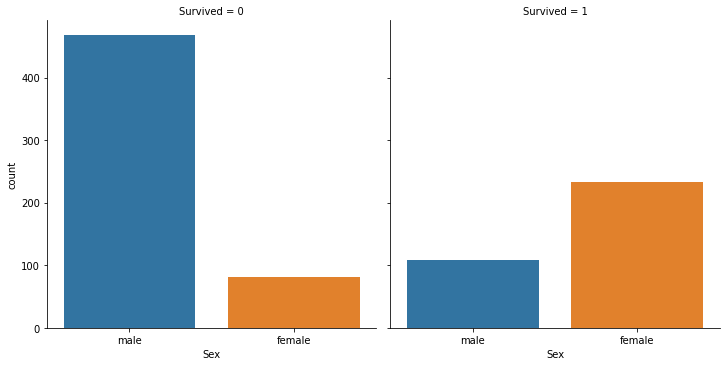

In [13]:
sns.catplot(x='Sex', col='Survived', kind='count',data=df)
plt.show()

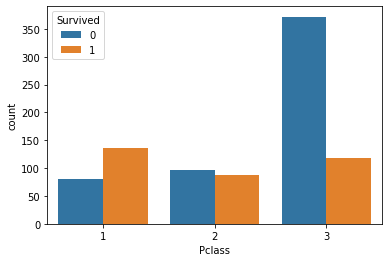

In [14]:
sns.countplot(x=df['Pclass'], hue=df['Survived'])
plt.show()

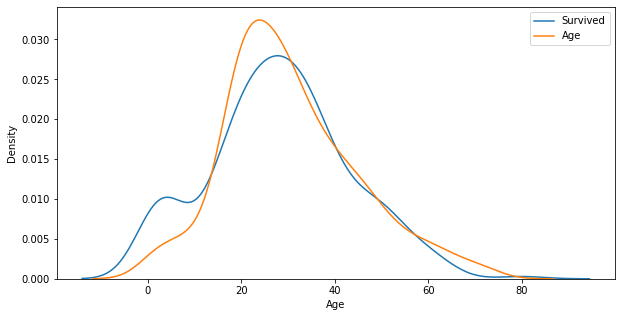

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.kdeplot(x=df[df.Survived == 1]['Age'], ax=ax)
sns.kdeplot(x=df[df.Survived == 0]['Age'], ax=ax)

plt.legend(['Survived','Age'])
plt.show()

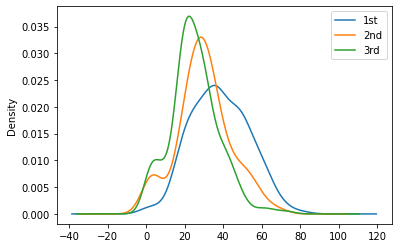

In [27]:
df['Age'][df.Pclass==1].plot(kind='kde')
df['Age'][df.Pclass==2].plot(kind='kde')
df['Age'][df.Pclass==3].plot(kind='kde')


plt.legend(['1st','2nd','3rd'])
plt.show()

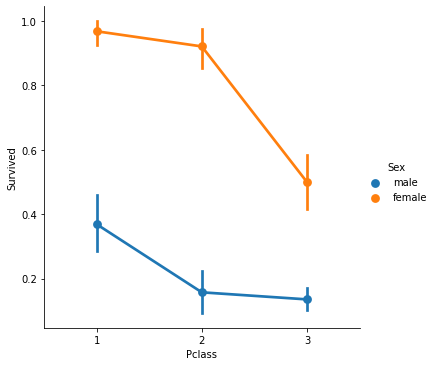

In [26]:
sns.catplot(x='Pclass',y='Survived', hue='Sex', kind='point', data=df)
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

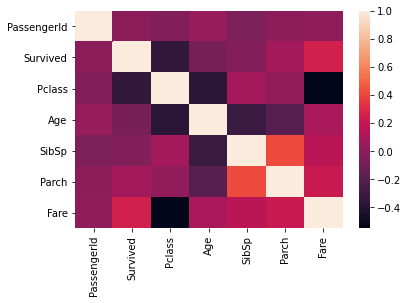

In [15]:
sns.heatmap(df.corr())

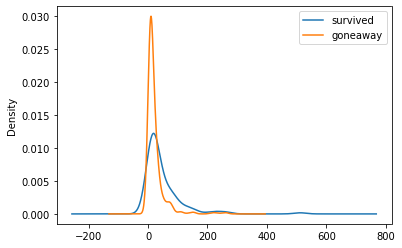

In [29]:
df['Fare'][df.Survived==1].plot(kind='kde')
df['Fare'][df.Survived==0].plot(kind='kde')

plt.legend(['survived','goneaway'])
plt.show()

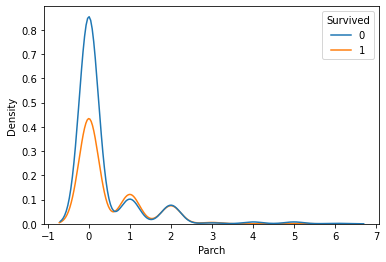

In [17]:
sns.kdeplot(x=df['Parch'], hue=df['Survived'])
plt.show()

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

In [30]:
testdf = pd.read_csv('/content/sample_data/california_housing_test.csv')
testdf.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0


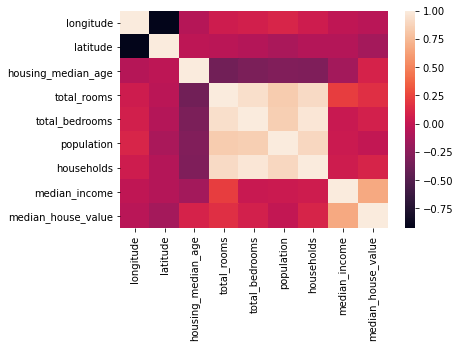

In [50]:
sns.heatmap(testdf.corr())

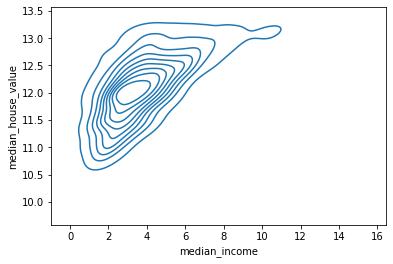

In [42]:
# 소득이 높은 곳이 집값도 비싼가? - 약간 관련성이있어보임
sns.kdeplot(x=testdf['median_income'], y=np.log(testdf['median_house_value']))
plt.show()

In [45]:
np.percentile(testdf['median_income'],90)

6.0576099999999995

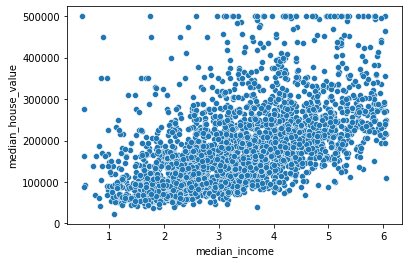

In [49]:
# 소득이 높은 곳이 집값도 비싼가? - 소득 하위 90%만. 관련이 있어보임
sns.scatterplot(x=testdf['median_income'], y=testdf.loc[testdf['median_income']<6.06]['median_house_value'])
plt.show()

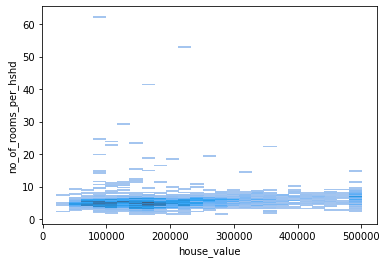

In [58]:
# 한 가구당 방이 많으면, 평균 집값도 높은가?
sns.histplot(x=testdf['median_house_value'], y=testdf['total_rooms']/testdf['households'])
plt.xlabel('house_value')
plt.ylabel('no_of_rooms_per_hshd')
plt.show()

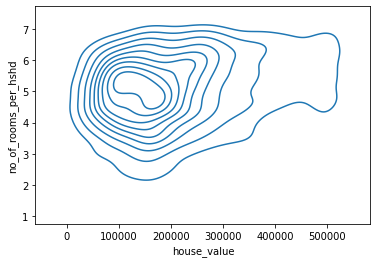

In [65]:
# 한 가구당 방이 많으면, 평균 집값도 높은가? (이상치 제거 버전) - Nope, 같은 방이여도 가격 차이가 많이난다. 
# testdf['no_room_per_hshd']=testdf['total_rooms']/testdf['households']
# np.percentile(testdf['no_room_per_hshd'], 90) #6.92

sns.kdeplot(x=testdf['median_house_value'], y=testdf.loc[testdf['no_room_per_hshd']<6.92]['no_room_per_hshd'])
plt.xlabel('house_value')
plt.ylabel('no_of_rooms_per_hshd')
plt.show()

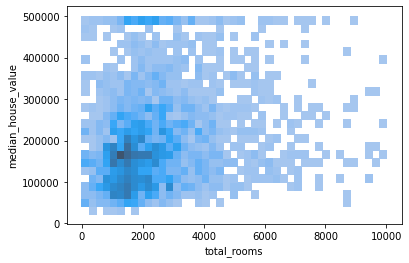

In [39]:
#의미 찾기 어려움... 

sns.histplot(x=testdf['total_rooms'], bins='auto',y=testdf.loc[testdf['total_rooms']<10000]['median_house_value'])
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()